<a href="https://colab.research.google.com/github/SonatonKumar/Python_project/blob/main/prediction_of_health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
insurance_df=pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [6]:
sns.set_style('darkgrid')
mp.rcParams['figure.figsize']=(10,6)
mp.rcParams['font.size']=14
mp.rcParams['figure.titlesize']=18
mp.rcParams['figure.facecolor'] = '#00000000'

In [7]:
insurance_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [8]:
fig=px.histogram(insurance_df,x='age',title='Age Distribution', marginal='box', nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig1=px.histogram(insurance_df,x='bmi',title='BMI distribution',color_discrete_sequence=['red'], marginal='box')
fig1.update_layout(bargap=0.1)
fig1.show()

In [10]:
fig2=px.histogram(insurance_df,x='charges',title='Annual medical charges',color='smoker',
                  color_discrete_sequence=['grey', 'blue'], marginal='box')
fig2.update_layout(bargap=0.1)
fig2.show()

In [11]:
fig3=px.histogram(insurance_df,x='smoker',color='sex')
fig3.update_layout(bargap=0.1)
fig3.show()
insurance_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [12]:
fig3=px.histogram(insurance_df,x='smoker',color='region')
fig3.update_layout(bargap=0.1)
fig3.show()

In [13]:
f=px.histogram(insurance_df,x='children',color='sex')
f.update_layout(bargap=0.1)
f.show()

In [14]:
fig4=px.scatter(insurance_df, x='age', y='charges', color='region',opacity=0.5, title='Age vs Charges',
                hover_data=['region'])
fig4.show()

In [15]:
f=px.scatter(insurance_df, x='age', y='charges',color='smoker')
f.update_traces(marker_size=5)
f.show()

In [16]:
f1=px.scatter(insurance_df, x='bmi', y='charges',color='smoker')
f1.update_traces(marker_size=5)
f1.show()

In [17]:
x=float(insurance_df.charges.corr(insurance_df.age))
x

0.2990081933306476

In [18]:
float(insurance_df.charges.corr(insurance_df.bmi))

0.19834096883362895

In [19]:
float(insurance_df.charges.corr(insurance_df.children))

0.06799822684790478

In [20]:
smoker_values={'yes':1,'no':0}
smoker_numeric=insurance_df.smoker.map(smoker_values)
float(insurance_df.charges.corr(smoker_numeric))

0.787251430498478

# **Setting Linear Regression **

In [21]:
non_smoker_df=insurance_df[insurance_df.smoker=='no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [22]:
fg=px.scatter(non_smoker_df, x='age', y='charges')
fg.show()

In [23]:
smoker_values = {'no': 0, 'yes': 1}
sex_values={'male':0,'female':1}
region_values={'northeast':0,'northwest':1,'southeast':2,'southwest':3}
numeric_df=insurance_df.copy()
numeric_df.smoker= insurance_df.smoker.map(smoker_values)
numeric_df.sex=insurance_df.sex.map(sex_values)
numeric_df.region=insurance_df.region.map(region_values)
corr_mat=numeric_df.corr()
corr_mat

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,-0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [24]:
numeric_df=numeric_df.select_dtypes(include='number')
numeric_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


Text(0.5, 1.0, 'Correlation matrix')

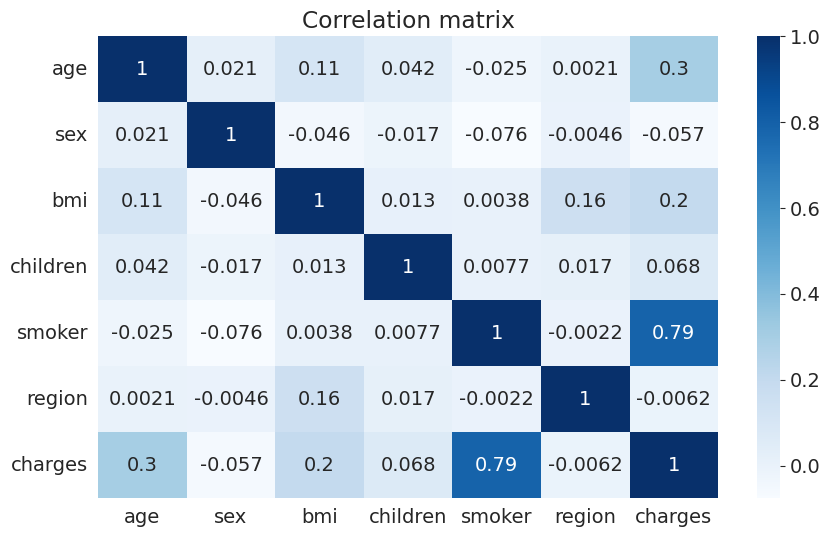

In [25]:
sns.heatmap(numeric_df.corr(),cmap='Blues',annot=True)
plt.title('Correlation matrix')

In [26]:
def predict_chrg(age,m,b):
    return m*age+b
import numpy as np

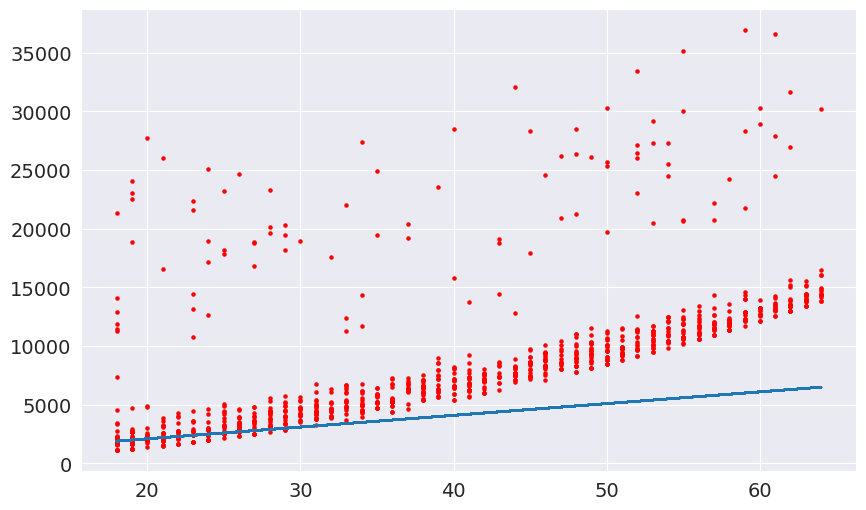

In [27]:
age=non_smoker_df.age
chrg=predict_chrg(age,100,100)
df=pd.DataFrame({'age':age,'predicted':chrg, 'actual':numeric_df.charges})
plt.scatter(df.age,df.actual, s=5, color='red')
plt.plot(df.age,df.predicted)

In [28]:
def try_params(m,b):
    age=non_smoker_df.age
    chrg=predict_chrg(age,m,b)
    df=pd.DataFrame({'age':age,'predicted':chrg, 'actual':numeric_df.charges})
    rmse=np.sqrt(np.mean((df.predicted-df.actual)**2))
    print(f"rmse={rmse}")
    plt.scatter(df.age,df.actual, s=5, color='red')
    plt.plot(df.age,df.predicted)

rmse=4745.860761807111


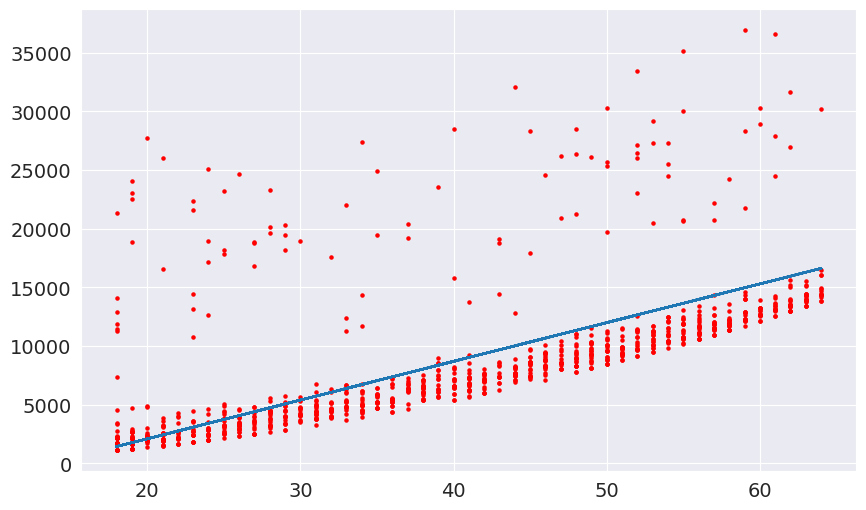

In [29]:
try_params(330,-4500)

# ***Model creation using SciKit learn***

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [33]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df['charges']
targets.shape

(1064,)

In [34]:
model.fit(inputs,targets)

LinearRegression()

In [35]:
model.predict(np.array([[30]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5926.04682837])

In [36]:
model.predict(pd.DataFrame([[30]], columns=['age']))

array([5926.04682837])

In [37]:
help(model.predict)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._base.LinearRegression instance
    Predict using the linear model.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



In [38]:
a=model.coef_
b=model.intercept_

rmse=4662.505766636395


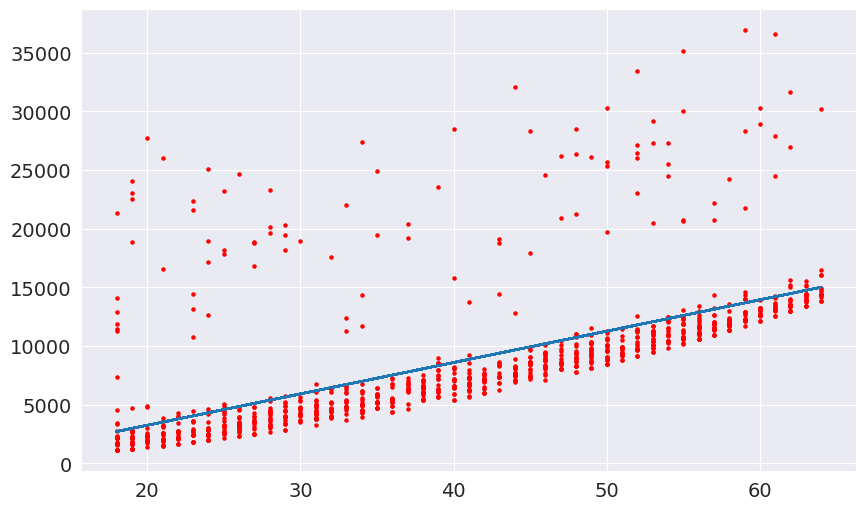

In [39]:
try_params(a,b)

In [40]:
inp=numeric_df[['age']]
tar=numeric_df['charges']
model.fit(inp,tar)

LinearRegression()

In [41]:
model.predict(pd.DataFrame([[30]], columns=['age']))

array([10897.56356607])

In [42]:
smoker_df=numeric_df[numeric_df.smoker==1]
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
11,62,1,26.290,0,1,2,27808.72510
14,27,0,42.130,0,1,2,39611.75770
19,30,0,35.300,0,1,3,36837.46700
23,34,1,31.920,1,1,0,37701.87680
...,...,...,...,...,...,...,...
1313,19,1,34.700,2,1,3,36397.57600
1314,30,1,23.655,3,1,1,18765.87545
1321,62,0,26.695,0,1,0,28101.33305
1323,42,1,40.370,2,1,2,43896.37630


In [43]:
input=smoker_df[['age']]
target=smoker_df['charges']
model.fit(input,target)

LinearRegression()

In [44]:
model.predict(pd.DataFrame([[62]], columns=['age']))

array([39218.85945773])

rmse=24338.502872599212


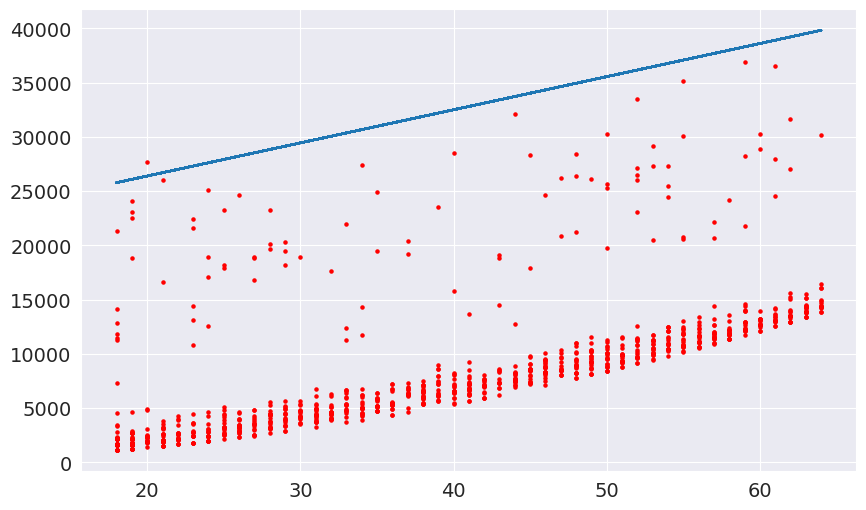

In [45]:
try_params(model.coef_,model.intercept_)

# **LinearRegression using multiple features**
==> charges = m1.age + m2.bmi + b

In [46]:
inputs2,targets2=non_smoker_df[['age','bmi']], non_smoker_df['charges']
model.fit(inputs2,targets2)
pre2=model.predict(inputs2)

In [47]:
def rmse(predicts,targets):
    rmse=np.sqrt(np.mean((predicts-targets)**2))
    return rmse
rmse(pre2,targets2)

np.float64(4662.3128354612945)

In [48]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [49]:
#taking the total dataset
inputs3,targets3=non_smoker_df[['age','bmi','children']], non_smoker_df['charges']
model.fit(inputs3,targets3)
predict3=model.predict(inputs3)
predict3

array([2724.94209163, 6535.13457204, 6065.27173951, ..., 2134.51524931,
       2160.54349555, 2898.08585583])

In [50]:
model.coef_,model.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]),
 np.float64(-2809.2976032235892))

In [51]:
rmse(predict3,targets3)

np.float64(4608.470405038247)

In [52]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

# **Taking smoker column into action**

In [53]:
inputs4, targets=numeric_df[['age','bmi','children','smoker']], numeric_df['charges']
model.fit(inputs4,targets)
preds=model.predict(inputs4)
preds

array([25587.42524891,  3880.94594512,  7158.62006921, ...,
        4398.7459491 ,  1615.83647369, 36793.67069541])

In [54]:
rmse(preds,targets)

np.float64(6056.439217188081)

In [55]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## **# using catagorical data**

In [56]:
px.bar(insurance_df,x='region',y='charges',color='smoker')

Text(0.5, 1.0, 'Region vs charges')

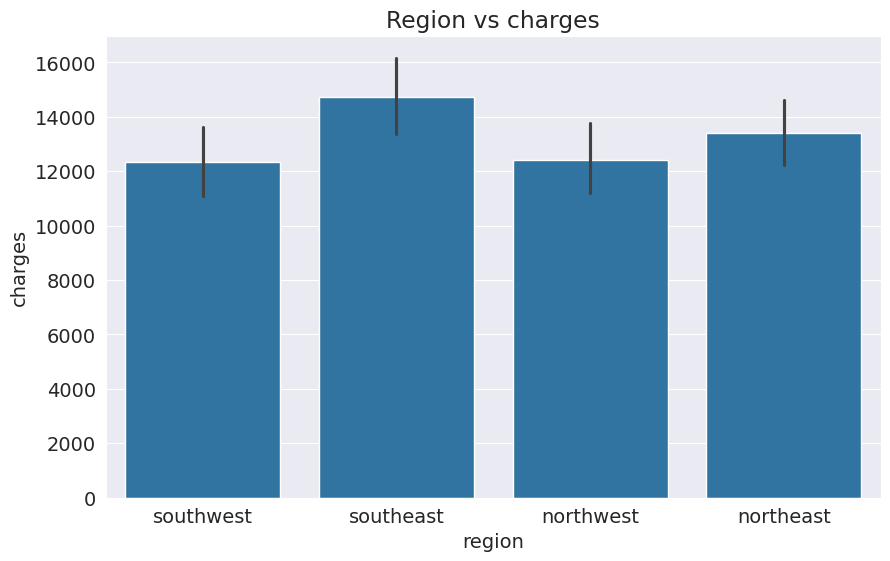

In [57]:
sns.barplot(x='region',y='charges',data=insurance_df)
plt.title('Region vs charges')

In [76]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(insurance_df[['region','sex','smoker']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [77]:
one_hot=enc.transform(insurance_df[['region','sex','smoker']]).toarray()
one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [78]:
insurance_df[['northeast', 'northwest', 'southeast', 'southwest','female','male','non_smoker','hsmoker']] = one_hot
insurance_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,female,male,non_smoker,hsmoker
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [79]:
model2=LinearRegression()
model2.fit(insurance_df[['age','bmi','children','northeast', 'northwest', 'southeast', 'southwest','female','male','non_smoker','hsmoker']],insurance_df['charges'])

LinearRegression()

In [81]:
pr=model2.predict(insurance_df[['age','bmi','children','northeast', 'northwest', 'southeast', 'southwest','female','male','non_smoker','hsmoker']])
pr

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [82]:
pd.DataFrame({'actual':insurance_df['charges'],'predicted':pr})

,actual,predicted
0,16884.92400,25293.713028
1,1725.55230,3448.602834
2,4449.46200,6706.988491
3,21984.47061,3754.830163
4,3866.85520,5592.493386
...,...,...
1333,10600.54830,12351.323686
1334,2205.98080,3511.930809
1335,1629.83350,4149.132486
1336,2007.94500,1246.584939


In [83]:
rmse(pr,insurance_df['charges'])

np.float64(6041.6796511744515)